# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), Let's build a model that can predict whether or not a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

In [4]:
import pandas as pd

In [6]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [8]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [10]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [12]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [16]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

# Project Tasks


-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**Since we will be attempting to predict loan_status, let's create a countplot as shown below.**

<Axes: xlabel='loan_status', ylabel='count'>

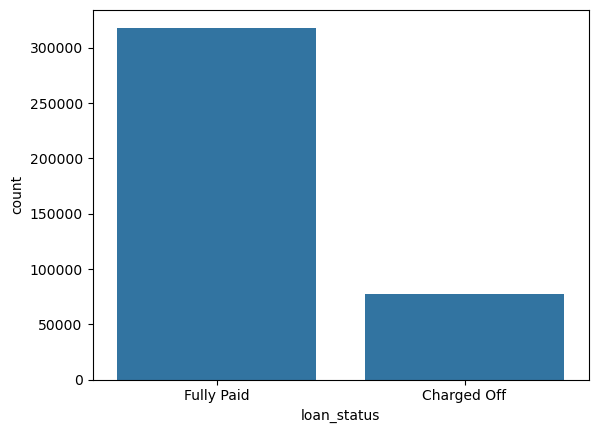

In [26]:
sns.countplot(df,x='loan_status')

<Axes: xlabel='term', ylabel='count'>

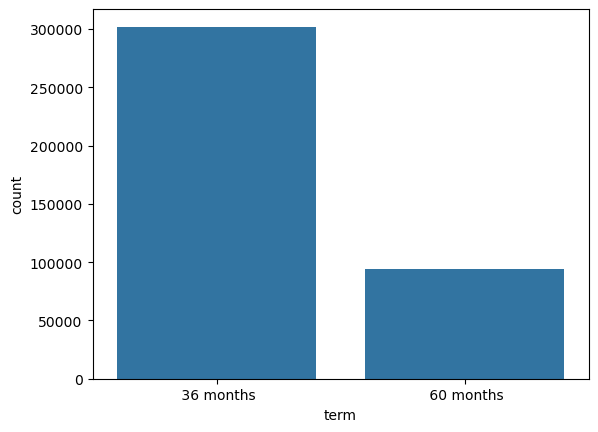

In [30]:
sns.countplot(df,x='term')

<Axes: xlabel='int_rate', ylabel='Count'>

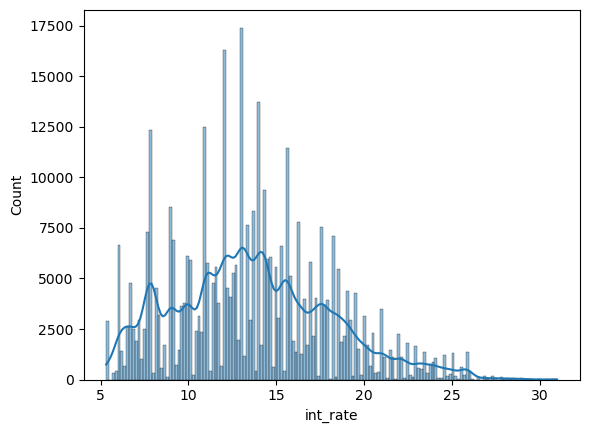

In [40]:
sns.histplot(df,x='int_rate',kde=True)

<Axes: xlabel='grade', ylabel='count'>

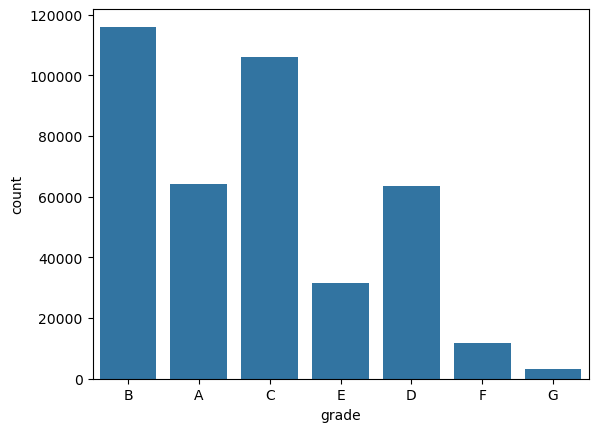

In [42]:
sns.countplot(df,x='grade')

**Let's create a histogram of the loan_amnt column.**

<Axes: xlabel='loan_amnt', ylabel='Count'>

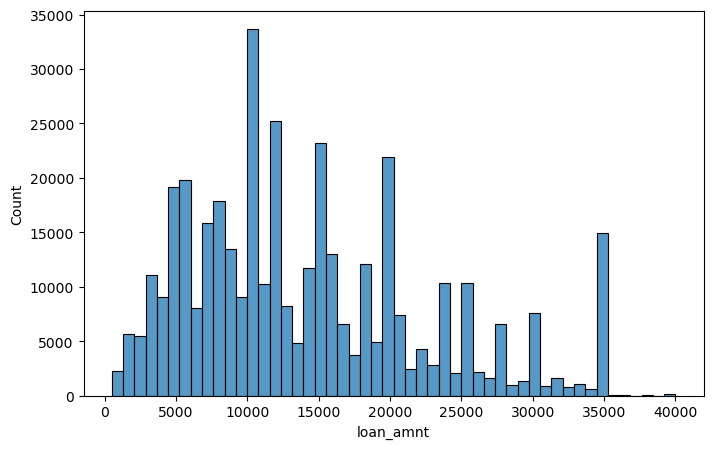

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(df,x='loan_amnt',bins=50)

**Let's explore correlation between the continuous feature variables. And calculate the correlation between all continuous numeric variables using .corr() method.**

In [62]:
df_corr=df.corr(numeric_only=True)
df_corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Let's visualize this using a heatmap.**

<Axes: >

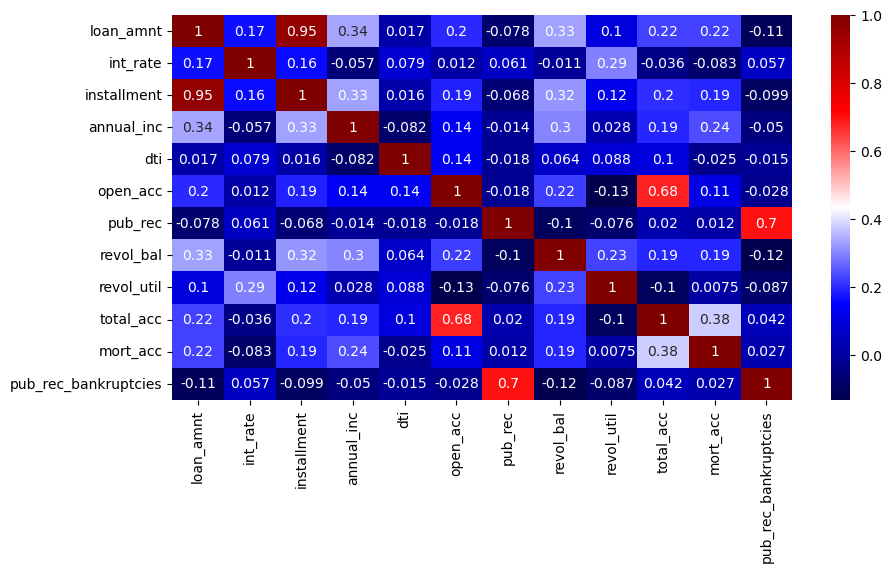

In [82]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_corr,cmap='seismic',annot=True)

**Notice almost perfect correlation with the "installment" feature. Let's explore this feature further. By printing out their descriptions and perform a scatterplot between them. Does this relationship make sense? Do I think there is duplicate information here?**

In [86]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [88]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [92]:
df[['installment','loan_amnt']].head(100)

,installment,loan_amnt
0,329.48,10000.0
1,265.68,8000.0
2,506.97,15600.0
3,220.65,7200.0
4,609.33,24375.0
...,...,...
95,1061.99,30000.0
96,376.36,12625.0
97,399.86,13400.0
98,624.27,24250.0


<Axes: xlabel='installment', ylabel='loan_amnt'>

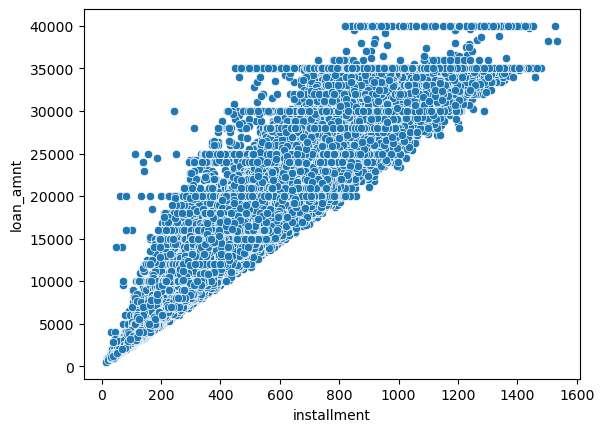

In [94]:
sns.scatterplot(df,x='installment',y='loan_amnt')

**Let's create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

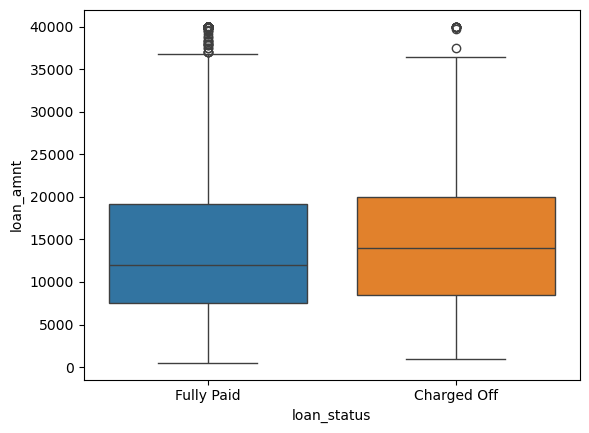

In [120]:
sns.boxplot(df,x='loan_status',y='loan_amnt',hue='loan_status')

**Let's calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [122]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [166]:
print(df['grade'].sort_values().unique())

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [172]:
print(df['sub_grade'].sort_values().unique())

['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


**Let's create a countplot per grade. Set the hue to the loan_status label.**

<Axes: xlabel='grade', ylabel='count'>

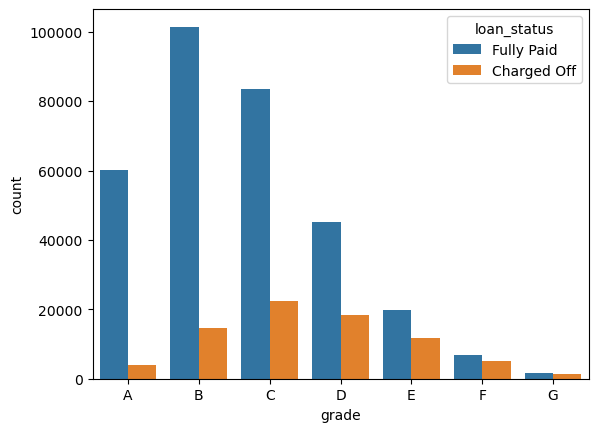

In [180]:
sns.countplot(df,x='grade',hue='loan_status',order=df['grade'].sort_values().unique())

**Displaying a count plot per subgrade.
After creating this plot, We'll create a similar plot, but setting hue="loan_status"**

/var/folders/x3/vtmxgrf10kgd8jfr4f4fg5bc0000gn/T/ipykernel_2431/1551852696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='sub_grade',order=df['sub_grade'].sort_values().unique(),palette='coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

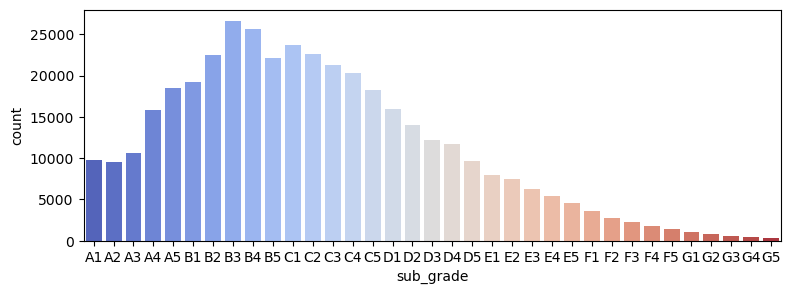

In [210]:
plt.figure(figsize=(9, 3))
sns.countplot(df,x='sub_grade',order=df['sub_grade'].sort_values().unique(),palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

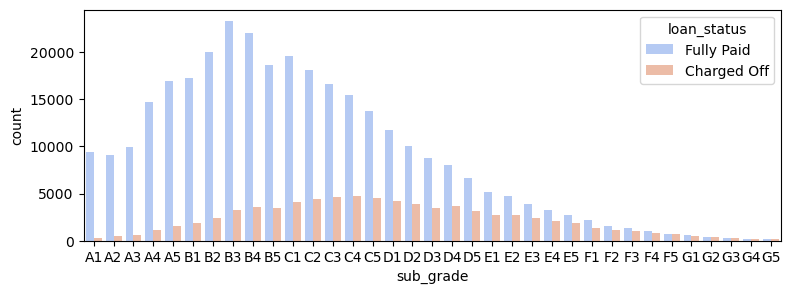

In [212]:
plt.figure(figsize=(9, 3))
sns.countplot(df,x='sub_grade',hue='loan_status',order=df['sub_grade'].sort_values().unique(),palette='coolwarm')

**It looks like F and G subgrades don't get paid back that often. Let's isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

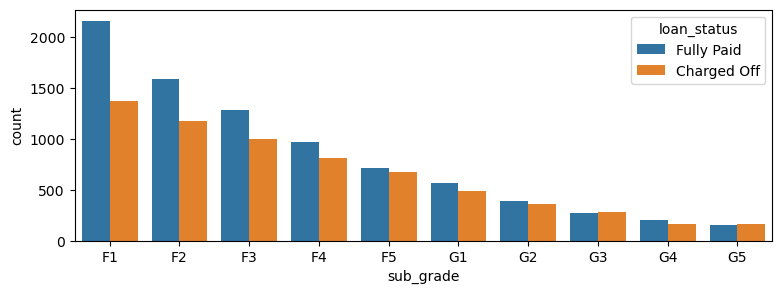

In [236]:
plt.figure(figsize=(9, 3))
order = df[(df['grade']=='G') | (df['grade']=='F')]['sub_grade'].sort_values().unique()
sns.countplot(df[(df['grade']=='G') | (df['grade']=='F')],x='sub_grade',hue='loan_status',order=order)

**Let's create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [736]:
dic = {'Fully Paid':1,'Charged Off':0}
df['loan_repaid'] = df['loan_status'].map(dic)
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [738]:
df['loan_repaid'].value_counts()

loan_repaid
1    318357
0     77673
Name: count, dtype: int64

In [740]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

**Let's create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<Axes: ylabel='loan_repaid'>

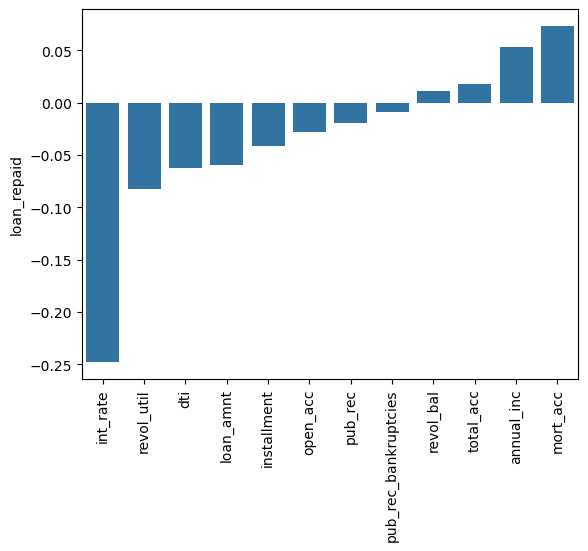

In [742]:
plt.xticks(rotation=90)
sns.barplot(df.corr(numeric_only=True)['loan_repaid'].drop('loan_repaid').sort_values())

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [744]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**What is the length of the dataframe?**

In [746]:
len(df)

396030

**Let's create a Series that displays the total count of missing values per column.**

In [748]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Let's convert this Series to be in term of percentage of the total DataFrame**

In [750]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

<Axes: title={'center': '% of missing data'}>

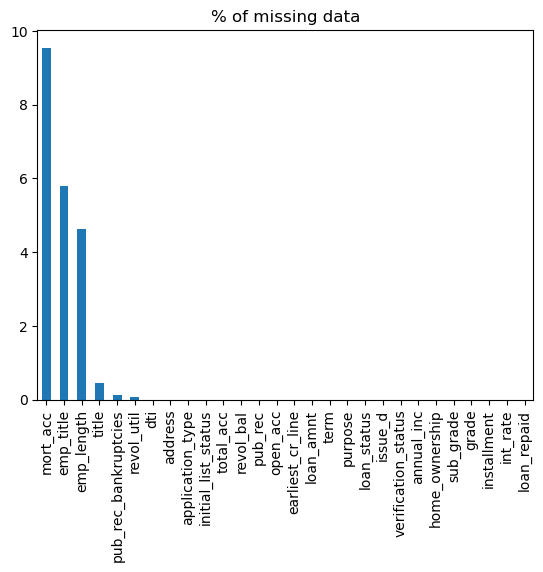

In [752]:
plt.title('% of missing data')
((df.isnull().sum()/len(df))*100).sort_values(ascending=False).plot(kind='bar')

**Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [754]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [756]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**How many unique employment job titles are there?**

In [758]:
df['emp_title'].nunique()

173105

In [760]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [764]:
df = df.drop('emp_title',axis=1)

In [766]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 394274 non-null  object 
 14  dti                   396030 non-null  float64
 15  

**Count plot of the emp_length feature column.**

In [768]:
emp_length = df['emp_length'].sort_values().unique()
emp_length

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

/var/folders/x3/vtmxgrf10kgd8jfr4f4fg5bc0000gn/T/ipykernel_2431/1646699974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='emp_length',order=emp_length,palette='tab10')


<Axes: xlabel='emp_length', ylabel='count'>

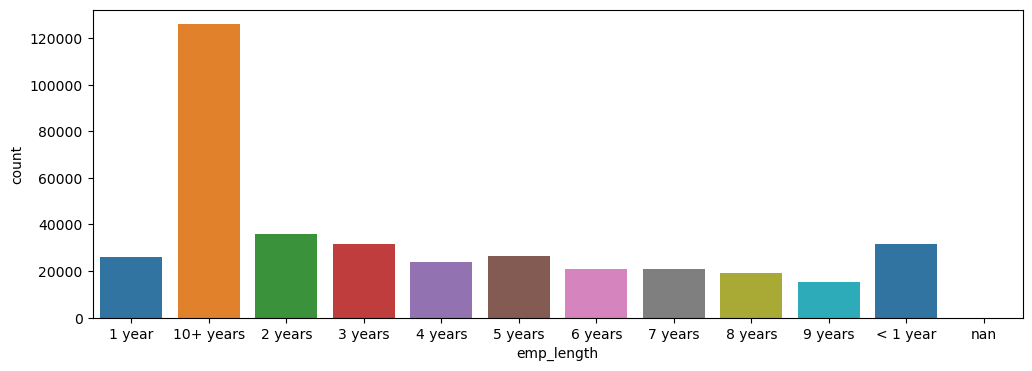

In [770]:
plt.figure(figsize=(12,4))

sns.countplot(df,x='emp_length',order=emp_length,palette='tab10')

**Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

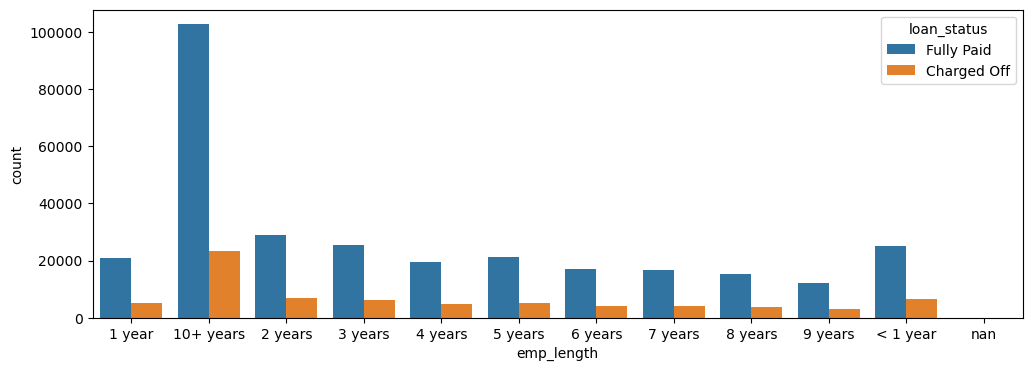

In [772]:
plt.figure(figsize=(12,4))

sns.countplot(df,x='emp_length',order=emp_length,hue='loan_status')

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [774]:
total = df['emp_length'].value_counts()

In [776]:
charged_off = df[df['loan_status']=='Charged Off']['emp_length'].value_counts()

In [778]:
charged_off

emp_length
10+ years    23215
2 years       6924
< 1 year      6563
3 years       6182
1 year        5154
5 years       5092
4 years       4608
7 years       4055
6 years       3943
8 years       3829
9 years       3070
Name: count, dtype: int64

In [780]:
total

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [782]:
percentage = round((charged_off/total)*100,2)

<Axes: xlabel='emp_length'>

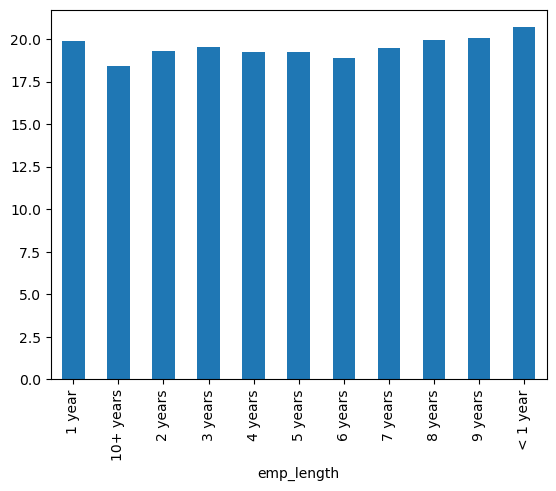

In [784]:
percentage.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Let's Go ahead and drop the emp_length column.**

In [787]:
df = df.drop('emp_length',axis=1)

**Revisiting the DataFrame to see what feature columns still have missing data.**

In [790]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Let's review the title column vs the purpose column. Is this repeated information?**

In [792]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [794]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [796]:
df[['title','purpose']].head(20)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


**The title column is simply a string subcategory/description of the purpose column. We'll drop the title column.**

In [798]:
df = df.drop('title',axis=1)

**Let's find out what the mort_acc feature represents**

In [801]:
feat_info('mort_acc')

Number of mortgage accounts.


**Lets create a value_counts of the mort_acc column.**

In [804]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

<Axes: xlabel='mort_acc'>

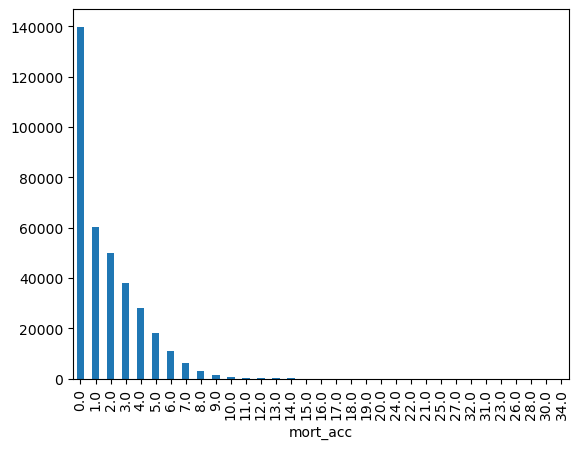

In [806]:
df['mort_acc'].value_counts().plot(kind='bar')

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or we could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [809]:
df.corr(numeric_only = True)['mort_acc'].drop('mort_acc').sort_values(ascending=False)

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [812]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**

In [815]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [817]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [818]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Let's remove the rows that are missing those values in those columns with dropna().**

In [821]:
df = df.dropna()

In [823]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**


In [826]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Let's convert the term feature into either a 36 or 60 integer**

In [829]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [831]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [833]:
df['term'].value_counts()

term
36    301247
60     93972
Name: count, dtype: int64

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [836]:
df = df.drop('grade',axis=1)

**Let's convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [838]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [840]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [842]:
df.loc[:,'A2':'G5']

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [844]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Let's convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [846]:
verification_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
df = pd.concat([df.drop('verification_status',axis=1),verification_dummies],axis=1)

In [850]:
df[['Verified','Source Verified']]

,Verified,Source Verified
0,False,False
1,False,False
2,False,True
3,False,False
4,True,False
...,...,...
396025,False,True
396026,False,True
396027,True,False
396028,True,False


In [856]:
application_dummies = pd.get_dummies(df['application_type'],drop_first=True)
df = pd.concat([df.drop('application_type',axis=1),application_dummies],axis=1)

In [868]:
df = df.rename(columns={'INDIVIDUAL': 'application_type_INDIVIDUAL', 'JOINT': 'application_type_JOINT'})

In [864]:
dummies = pd.get_dummies(df[['initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [870]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

### home_ownership
**Let's review the value_counts for the home_ownership column.**

In [872]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

**Let's convert these to dummy variables, replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [878]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [880]:
home_ownershipdummies = pd.get_dummies(df['home_ownership'],prefix='home_ownership',drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),home_ownershipdummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'home_ownership_OTHER',
       'home_ownership_OWN'

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [890]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [892]:
df['zip_code'].value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

**Now let's make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [894]:
zip_code_dummmies = pd.get_dummies(df['zip_code'],prefix='zip_code',drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),zip_code_dummmies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'home_ownership_OTHER',
       'home_ownership_OWN'

In [912]:
df = df.drop('address',axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, let's drop this feature.**

In [ ]:
df = df.drop('issue_d',axis=1)

In [906]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_own

### earliest_cr_line
**This appears to be a historical time stamp feature. Let's extract the year from this feature**

In [908]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [914]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [918]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 395219, dtype: object

## Train Test Split

**Import train_test_split from sklearn.**

In [1014]:
from sklearn.model_selection import train_test_split

**Let's drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [924]:
df = df.drop('loan_status',axis=1)

In [1020]:
df['loan_repaid'].value_counts()

loan_repaid
1    317696
0     77523
Name: count, dtype: int64

**Let's set X and y variables to the .values of the features and label.**

In [1022]:
X = df.drop('loan_repaid',axis=1).values

In [1024]:
y = df['loan_repaid'].values

**Let's perform a train/test split with test_size=0.2 and a random_state of 101.**

In [1204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Normalizing the Data

**Let's use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [1206]:
from sklearn.preprocessing import MinMaxScaler

In [1208]:
scaler = MinMaxScaler()

In [1210]:
X_train = scaler.fit_transform(X_train)

In [1211]:
X_test = scaler.transform(X_test)

# Creating the Model

**Let's run the cell below to import the necessary Keras functions.**

In [1214]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Now we'll build a sequential model to will be trained on the data.

In [1216]:
X_train.shape

(276653, 78)

In [1218]:
model = Sequential()
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

In [1220]:
model.compile(loss='binary_crossentropy', optimizer='adam')

**Let's fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [1223]:
model.fit(x=X_train,
          y=y_train,
          epochs=30,
          batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.3515 - val_loss: 0.2667
Epoch 2/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2757 - val_loss: 0.2645
Epoch 3/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2691 - val_loss: 0.2635
Epoch 4/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2670 - val_loss: 0.2648
Epoch 5/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2658 - val_loss: 0.2639
Epoch 6/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2648 - val_loss: 0.2639
Epoch 7/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2641 - val_loss: 0.2633
Epoch 8/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2639 - val_loss: 0.2625
Epoch 9/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.2636 - val_loss: 0.2632
Epoch 10/30
1081/1081 [==============================] - 1s 1ms/step - loss: 0.263

**Save the model.**

In [134]:
# CODE HERE

In [1225]:
from tensorflow.keras.models import load_model

In [1227]:
model.save('python_TF_Keras_Financial_Project.h5')  

# Section 3: Evaluating Model Performance.

**Let's plot out the validation loss versus the training loss.**

In [1229]:
losses = pd.DataFrame(model.history.history)

<Axes: >

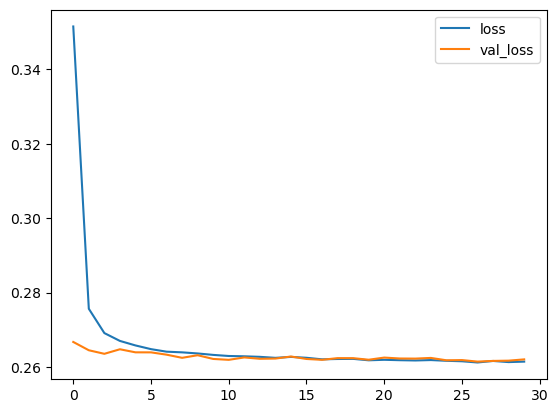

In [1231]:
losses[['loss','val_loss']].plot()

**Predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [1233]:
predictions = model.predict(X_test)

3706/3706 [==============================] - 1s 198us/step


In [1235]:
predictions

array([[1.       ],
       [1.       ],
       [1.       ],
       ...,
       [0.       ],
       [0.5984968],
       [0.6357738]], dtype=float32)

In [1237]:
predicted_classes = (predictions > 0.5).astype("int32")

In [1239]:
predicted_classes

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [1241]:
from sklearn.metrics import classification_report,confusion_matrix

In [1243]:
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566



In [1245]:
print(confusion_matrix(y_test,predicted_classes))

[[ 9965 13398]
 [    5 95198]]


**Given the customer below, would our model offer this person a loan?**

In [1321]:
new_customer = df.drop('loan_repaid',axis=1).iloc[15000]
new_customer.values.reshape(1,78)

array([[13500.0, 36, 16.99, 481.25, 75000.0, 12.54, 12.0, 0.0, 6674.0,
        32.1, 23.0, 4.0, 0.0, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, True, False, True, False, True, False, True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, 1993]], dtype=object)

In [1323]:
array = np.array(new_customer.values.reshape(1,78))
print(array.dtype)

object


In [1325]:
array = array.astype(np.float32)

In [1327]:
array

array([[1.3500e+04, 3.6000e+01, 1.6990e+01, 4.8125e+02, 7.5000e+04,
        1.2540e+01, 1.2000e+01, 0.0000e+00, 6.6740e+03, 3.2100e+01,
        2.3000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [1329]:
model.predict(array)

1/1 [==============================] - 0s 10ms/step


array([[1.]], dtype=float32)

**Our model predicts a Yes**

**Now check, did this person actually end up paying back their loan?**

In [1331]:
df['loan_repaid'][15000]

1

**That's a Yes**

# Section 4: Comparison With logistic Regression

**Let's create a model to compare ML logistic regression against Keras/TF Model**

## ML LR Train Test Split

In [1441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Normalizing the Data

In [1444]:
from sklearn.preprocessing import MinMaxScaler

In [1446]:
scaler = MinMaxScaler()

In [1448]:
X_train = scaler.fit_transform(X_train)

In [1449]:
X_test = scaler.transform(X_test)

## Training and Predicting

In [1452]:
from sklearn.linear_model import LogisticRegression

In [1454]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [1459]:
predictions = logmodel.predict(X_test)

## Evaluation

In [1461]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



In [1463]:
print(confusion_matrix(y_test,predictions))

[[10379 12984]
 [  311 94892]]


In [1479]:
new_customer = df.drop('loan_repaid',axis=1).iloc[15000].values.reshape(1,78)

In [1481]:
new_data_scaled = scaler.transform(new_customer)

In [1483]:
predictionsTest = logmodel.predict(new_data_scaled)

In [1485]:
predictionsTest

array([1])

In [1489]:
df['loan_repaid'].iloc[15000]

1